In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.layers import Flatten

<h2>Goal</h2>
 <b>Maximize the liklihood of our data being drawn from that distribution</b>
<h2>Error Calculation</h2>
In each epoch, the "error" is computed as a sum of the squared difference between step 1 and step n, i.e the difference between the original data and it's reconstruction
<br>The Mean Square Error(MSE)


In [49]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0_state - v1_state))
print("error" , err.numpy())

error 0.48979592


<h2>Training the model</h2>
In order to train the RBM, the goal is to maximize the product of probabilities assigned to all rows <b>v</b> in the training set <b>V</b>(a matrix) 
$$\arg \max_W \prod_{\mathbf{v}\in\mathbf{V}_T} p(\mathbf{v})$$

this is equivalent to maximizing the expectation of the log probability,
$$\arg\max_W\left[ \mathbb{E} \left(\prod_{\mathbf v\in \mathbf V}\text{log} \left(p(\mathbf v)\right) \right) \right]$$


so the approach is to update the weights $W_{ij}$ to increase <b>p(v)</b> for all <b>v</b>, so we need to calculate the derivative
$$\frac{\partial \log p(\mathbf v)}{\partial W_{ij}}$$

This cannot be implemented using the usual gradient descent algorithm, so another approach is used that includes: 
<ol>
    <li>Gibbs Sampling</li>
    <li>Contrastive Divergence</li>
</ol>

<h4>Gibbs Sampling Step 1</h4> 
Given an input vector $\mathbf{v}$, we are using $p(\mathbf{h}|\mathbf{v})$ to predict the hidden values $\mathbf{h}$. 
  $$p({h_j}|\mathbf v)= \sigma\left(\sum_{i=1}^V W_{ij} v_i + h_{bias} \right)$$
The samples are generated from this distribution by generating the uniform random variate vector $\mathbf{\xi} \sim U[0,1]$ of length $H$ and comparing to the computed probabilities as


<center>If $\xi_j>p(h_{j}|\mathbf{v})$, then $h_j=1$, else $h_j=0$.</center>


<h4>Gibbs Sampling Step 2</h4> 
Then, knowing the hidden values, we use $p(\mathbf v| \mathbf h)$ for reconstructing of new input values v. 

   $$p({v_i}|\mathbf h)= \sigma\left(\sum_{j=1}^H W^{T}_{ij} h_j + v_{bias} \right)$$


The samples are generated from this distribution by generating a uniform random variate vector $\mathbf{\xi} \sim U[0,1]$ of length $V$ and comparing to the computed probabilities as

<center>If $\xi_i>p(v_{i}|\mathbf{h})$, then $v_i=1$, else $v_i=0$.</center>

Let vectors $\mathbf v_k$ and $\mathbf h_k$ be for the $k$th iteration.  In general, the $kth$ state is generrated as: 


    
<b>Iteration</b> $k$: 

$$\mathbf v_{k-1} \Rightarrow p(\mathbf h_{k-1}|\mathbf v_{k-1})\Rightarrow \mathbf h_{k-1}\Rightarrow p(\mathbf v_{k}|\mathbf h_{k-1})\Rightarrow \mathbf v_k$$       
    
<h3>Contrastive Divergence (CD-k)</h3>
The update of the weight matrix is done during the Contrastive Divergence step. 

Vectors v0 and vk are used to calculate the activation probabilities for hidden values h0 and hk. The difference between the outer products of those probabilities with input vectors v0 and vk results in the update matrix:


$$\Delta \mathbf W_k =\mathbf v_k \otimes \mathbf h_k - \mathbf v_{k-1} \otimes \mathbf h_{k-1}$$

Contrastive Divergence is actually matrix of values that is computed and used to adjust values of the $\mathbf W$ matrix. Changing $\mathbf W$ incrementally leads to training of the  $\mathbf W$ values. Then, on each step (epoch), $\mathbf W$ is updated using the following:

$$\mathbf W_k = \mathbf W_{k-1} + \alpha * \Delta \mathbf W_k$$

In [6]:
(train_X, train_y), (test_X, test_y)= mnist.load_data()
flatten = Flatten(dtype='float32')
train_X = flatten(train_X/ 255.0)
train_y = flatten(train_y/255.0)

2024-03-09 09:24:08.794339: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 376320000 exceeds 10% of free system memory.
2024-03-09 09:24:08.917407: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


In [141]:
def create_batches(data, label, batch_size):
    num_samples = len(data)
    num_batches = num_samples // batch_size
    if num_samples % batch_size != 0:
        num_batches += 1
    batches = []
    for i in range(num_batches):
        start_index = i * batch_size
        end_index = min((i+1) * batch_size, num_samples)#last batch ko lagi if num_samples % batch_size != 0 
        batch_data = data[start_index:end_index]
        batch_label = label[start_index:end_index]
        batches.append((batch_data, batch_label))
    return batches

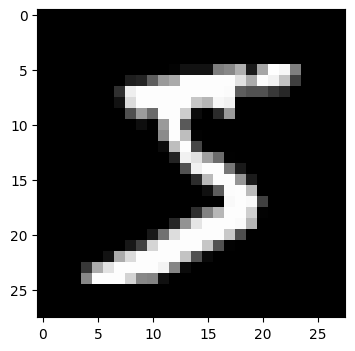

In [14]:
a = train_X[0].numpy().reshape(28, 28)
plt.rcParams['figure.figsize'] = (4.0, 4.0)
plt.imshow(a, cmap = "gray")

In [15]:
print(train_X.shape)

(60000, 784)


In [17]:
print(train_X[0])


tf.Tensor(
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         

In [18]:
class RBM:
    def __init__(self, n_visible, n_hidden): 
        self.n_visible = n_visible
        self.n_hidden = n_hidden
        self.v0_state = tf.Variable(tf.zeros([n_visible]), tf.float32)
        self.h0_state = tf.Variable(tf.zeros([n_hidden]), tf.float32)
        self.hb = tf.Variable(tf.zeros([n_hidden]), tf.float32)
        self.vb = tf.Variable(tf.zeros([n_visible]), tf.float32)
        self.W = tf.Variable(tf.zeros([n_visible, n_hidden]), tf.float32)
        self.errors = []
        self.weights = []

    def hidden_layer(self, v_state):
        h_prob = tf.nn.sigmoid(tf.matmul([v_state], self.W) + self.hb) 
        h_state = tf.nn.relu(tf.sign(h_prob - tf.random.uniform(tf.shape(h_prob)))) 
        return h_state

    def reconstructed_output(self, h_state):
        v_prob = tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(self.W)) + self.vb) 
        v_state = tf.nn.relu(tf.sign(v_prob - tf.random.uniform(tf.shape(v_prob))))
        return v_state[0]

    def predict_reconstruct(self, h_state):
        v_prob = tf.nn.sigmoid(tf.matmul(h_state, tf.transpose(self.W)) + self.vb)
        return v_prob

    def error(self, v0_state, v1_state):
        return tf.reduce_mean(tf.square(v0_state - v1_state))

    def train(self, train_ds, learning_rate=0.01, epochs=5, batchsize=32):
        batch_number = 0
        K = 1  # Set K to 1 for now
        
        for epoch in range(epochs):
            for batch_x, batch_y in train_ds: 
                batch_number += 1
                for i_sample in range(batchsize):
                    for k in range(K):
                            v0_state = batch_x[i_sample]
                            h0_state = self.hidden_layer(v0_state)
                            v1_state = self.reconstructed_output(h0_state)
                            h1_state = self.hidden_layer(v1_state)

                            delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                            self.W = self.W + learning_rate * delta_W
                        
                            delta_vb = tf.reduce_mean(v0_state - v1_state, axis=0)
                            delta_hb = tf.reduce_mean(h0_state - h1_state, axis=0) 
                            self.vb = self.vb + learning_rate * delta_vb
                            self.hb = self.hb + learning_rate * delta_hb
                            
                            v0_state = v1_state

                    if i_sample == batchsize - 1:
                        err = self.error(batch_x[i_sample], v1_state)
                        self.errors.append(err)
                        self.weights.append(W)
                        print('Epoch: %d' % epoch, "batch #: %i " % batch_number, 
                              "of %i" % int(60e3 / batchsize), "sample #: %i" % i_sample,
                              'reconstruction error: %f' % err)
    def save_model(self, filepath):
        variables = { 'W':self.W.numpy(), 
                     'vb':self.vb.numpy(), 
                     'hb':self.hb.numpy()}
        np.savez(filepath, **variables)

    def plot_error():
        plt.plot(self.errors)
        plt.xlabel("Batch Number")
        plt.ylabel("Error")
        plt.show()
    
    @classmethod
    def load_model(cls, filepath):
        data = np.load(filepath)
        model = cls(data['W'].shape[0], data['W'].shape[1])
        model.W.assign(data['W'])
        model.vb.assign(data['vb'])
        model.hb.assign(data['hb'])
        return model 
    def predict(self, input_data):
        reconstructed_data = []
        for sample in input_data:
            v0_state = sample
            h0_state = self.hidden_layer(v0_state)
            v1_state = self.predict_reconstruct(h0_state)
            v0_state = v1_state
            reconstructed_data.append(v1_state.numpy())
        return np.array(reconstructed_data)


In [19]:
train_ds = \
    tf.data.Dataset.from_tensor_slices((train_X, train_y)).batch(200).prefetch(tf.data.experimental.AUTOTUNE)

In [15]:
rbm_mnist  = RBM(28*28, 50)
rbm_mnist.train(train_ds, batchsize=200)


2024-02-29 18:51:13.650246: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch: 0 batch #: 1  of 300 sample #: 199 reconstruction error: 0.179424
Epoch: 0 batch #: 2  of 300 sample #: 199 reconstruction error: 0.204794
Epoch: 0 batch #: 3  of 300 sample #: 199 reconstruction error: 0.121915
Epoch: 0 batch #: 4  of 300 sample #: 199 reconstruction error: 0.117018
Epoch: 0 batch #: 5  of 300 sample #: 199 reconstruction error: 0.097472
Epoch: 0 batch #: 6  of 300 sample #: 199 reconstruction error: 0.195307
Epoch: 0 batch #: 7  of 300 sample #: 199 reconstruction error: 0.087328
Epoch: 0 batch #: 8  of 300 sample #: 199 reconstruction error: 0.111280
Epoch: 0 batch #: 9  of 300 sample #: 199 reconstruction error: 0.089363
Epoch: 0 batch #: 10  of 300 sample #: 199 reconstruction error: 0.181663
Epoch: 0 batch #: 11  of 300 sample #: 199 reconstruction error: 0.092471
Epoch: 0 batch #: 12  of 300 sample #: 199 reconstruction error: 0.136125
Epoch: 0 batch #: 13  of 300 sample #: 199 reconstruction error: 0.066594
Epoch: 0 batch #: 14  of 300 sample #: 199 reco

In [12]:
# rbm_mnist.save_model('mnist1.npz')

In [20]:
rbm_mnist = RBM.load_model('mnist1.npz')

In [21]:
from utils import tile_raster_images
from PIL import Image
# image = Image.fromarray(tile_raster_images(X =W.numpy().T[10:11], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
# ### Plot image
# plt.rcParams['figure.figsize'] = (4.0, 4.0)
# imgplot = plt.imshow(image)
# imgplot.set_cmap('gray')  

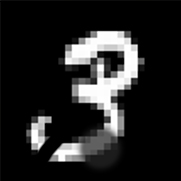

In [22]:
img = Image.open('destructed3.jpg')
img

In [23]:
# convert the image to a 1d numpy array
sample_case = np.array(img.convert('I').resize((28,28))).ravel().reshape((1, -1))/255.0
print(sample_case.shape)
sample_case = tf.cast(sample_case, dtype=tf.float32)




(1, 784)


In [59]:
output = rbm_mnist.predict(sample_case)

In [60]:
type(output)

numpy.ndarray

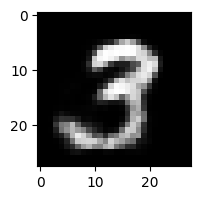

In [61]:
img = Image.fromarray(tile_raster_images(X=output[0], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (2.0, 2.0)
imgplot = plt.imshow(img)
imgplot.set_cmap('gray') 

In [43]:
loaded_model = RBM.load_model("mnist_model.npz")
vv1_p = loaded_model.predict(train_X[1].numpy().reshape(1, -1))
print(vv1_p.shape)


(1, 1, 784)


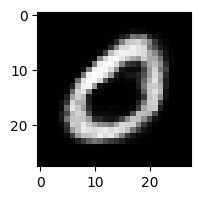

In [30]:
img = Image.fromarray(tile_raster_images(X=vv1_p[0], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (2.0, 2.0)
imgplot = plt.imshow(img)
imgplot.set_cmap('gray') 